In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sqlite3 as sql

## $Using$ $Pandas$
---

### Exercises
* Create a Pandas Series from a NumPy array of 20 random integers
* Index the array with CUSTOMER $n$ where $n$ represents the original index
* Import the Seaborn Titanic Dataset as a Pandas DataFrame, and plot a graph sorting the columns by amount of missing data
* Find the passenger with the least expensive first class ticket, where they embarked, and if they survived
* Group passengers by class and find the mean age within each class
* Merge the following DataFrames:

<div style="display:inline-flex;justify-content:space-evenly">


| NAME | NUMBER |
| ---- | ------ |
| Alice | 01234567890 |
| Charlie | 09876543210 |

| NAME | SCORE |
| ---- | ----- |
| Alice  | 90 |
| Bob | 80 |
| Emily | 65 |
| Charlie | 50 |

</div>

In [2]:
np_array = np.random.randint(0, 100, 20)
pd_array = pd.Series(np_array.flatten())
print(pd_array[:5])

0    87
1    54
2    54
3    85
4    54
dtype: int32


In [3]:
customers = ['CUSTOMER ' + str(i) for i in range(1, 21)]
pd_array.index = customers
print(pd_array[:5])

CUSTOMER 1    87
CUSTOMER 2    54
CUSTOMER 3    54
CUSTOMER 4    85
CUSTOMER 5    54
dtype: int32


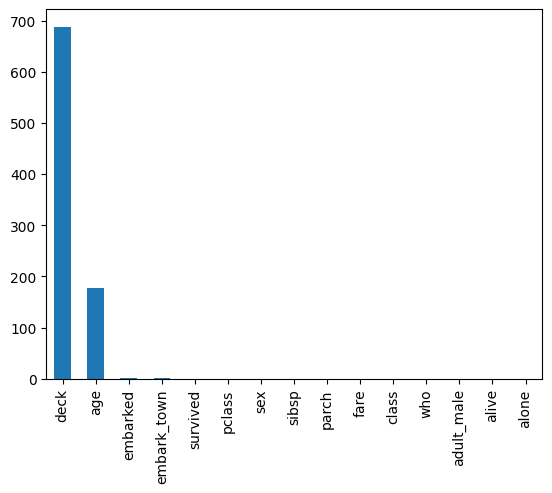

In [5]:
titanic = sns.load_dataset('titanic')
titanic_sorted = titanic.isna().sum().sort_values(ascending=False).plot(kind='bar')

In [11]:
highest_fare = titanic[titanic.loc[:, 'pclass']==1].sort_values(['fare']).head(1)
highest_fare.loc[:, 'fare':'embarked']

,fare,embarked
633,0.0,S


In [22]:
class_group = titanic.groupby('class').mean()
class_group.loc[:, 'age']

C:\Users\EmmyB.000\AppData\Local\Temp\ipykernel_12760\359715361.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  class_group = titanic.groupby('class').mean()


class
First     38.233441
Second    29.877630
Third     25.140620
Name: age, dtype: float64

In [28]:
students = ['Alice', 'Bob', 'Emily', 'Charlie']
scores = [90, 80, 65, 50]

contacts = pd.DataFrame({'name': ['Alice', 'Bob'], 'number': ['01234567890', '09876543210']})
exam_results = pd.DataFrame({'name': students, 'score': scores})

merged = exam_results.merge(contacts, on='name')
merged

,name,score,number
0,Alice,90,01234567890
1,Bob,80,09876543210
